# XGBoost 회귀 Sklearn Wrapper

## #01. 준비작업

### [1] 패키지 가져오기

In [13]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

from helper.util import *
from helper.plot import *
from helper.analysis import *
from helper.regression import *

from xgboost import XGBRegressor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### [2] 데이터 가져오기


In [14]:
origin = my_read_excel("https://data.hossam.kr/mldata/boston.xlsx", info=False)


상위 5개 행
+----+---------+------+---------+--------+-------+-------+-------+--------+-------+-------+-----------+--------+---------+--------+
|    |    CRIM |   ZN |   INDUS |   CHAS |   NOX |    RM |   AGE |    DIS |   RAD |   TAX |   PTRATIO |      B |   LSTAT |   MEDV |
|----+---------+------+---------+--------+-------+-------+-------+--------+-------+-------+-----------+--------+---------+--------|
|  0 | 0.00632 |   18 |    2.31 |      0 | 0.538 | 6.575 |  65.2 |   4.09 |     1 |   296 |      15.3 |  396.9 |    4.98 |     24 |
|  1 | 0.02731 |    0 |    7.07 |      0 | 0.469 | 6.421 |  78.9 | 4.9671 |     2 |   242 |      17.8 |  396.9 |    9.14 |   21.6 |
|  2 | 0.02729 |    0 |    7.07 |      0 | 0.469 | 7.185 |  61.1 | 4.9671 |     2 |   242 |      17.8 | 392.83 |    4.03 |   34.7 |
|  3 | 0.03237 |    0 |    2.18 |      0 | 0.458 | 6.998 |  45.8 | 6.0622 |     3 |   222 |      18.7 | 394.63 |    2.94 |   33.4 |
|  4 | 0.06905 |    0 |    2.18 |      0 | 0.458 | 7.147 |  54.2 | 

### [3] 훈련/검증 데이터 분할 및 데이터 표준화


In [15]:
x_train, x_test, y_train, y_test = my_train_test_split(origin, "MEDV", scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

## #02. XGBoost 학습 모델 적합

### [1] 기본 모형 만들기


In [16]:
estimator = XGBRegressor(
    # general params
    booster="gbtree",
    device="cpu",
    verbosity=0,
    n_jobs=get_n_jobs(),
    # train parameter
    objective="reg:squarederror",
    eval_metric="rmse",
    # booster params
    learning_rate=0.1,
    n_estimators=2000,
    min_child_weight=1,
    gamma=0,
    max_depth=6,
    subsample=1,
    colsample_bytree=1,
    reg_lambda=1,
    reg_alpha=0,
    random_state=get_random_state(),
    early_stopping_rounds=5,
)

estimator.fit(
    x_train, y_train, eval_set=[(x_train, y_train), (x_test, y_test)], verbose=False
)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device='cpu', early_stopping_rounds=5, enable_categorical=False,
             eval_metric='rmse', feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=2000,
             n_jobs=-1, num_parallel_tree=None, random_state=0, ...)

### [2] 성능 평가


[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.994955 |     0.725276 |
| 평균절대오차(MAE)             |     0.483952 |      2.78723 |
| 평균제곱오차(MSE)             |     0.429592 |      22.3703 |
| 평균오차(RMSE)                |     0.655433 |      4.72973 |
| 평균 절대 백분오차 비율(MAPE) |      2.73985 |      12.8607 |
| 평균 비율 오차(MPE)           |    -0.614492 |     -2.80975 |
+-------------------------------+--------------+--------------+

[학습곡선]


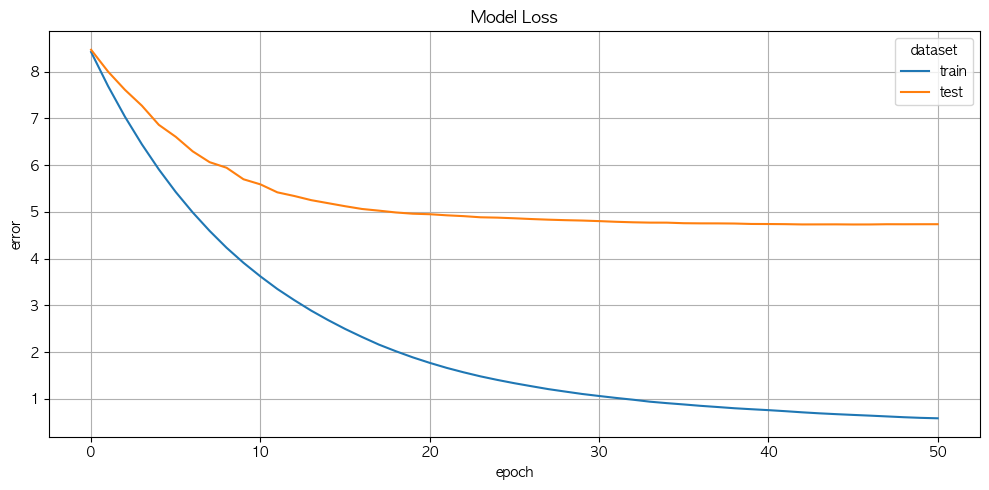


[변수 중요도]


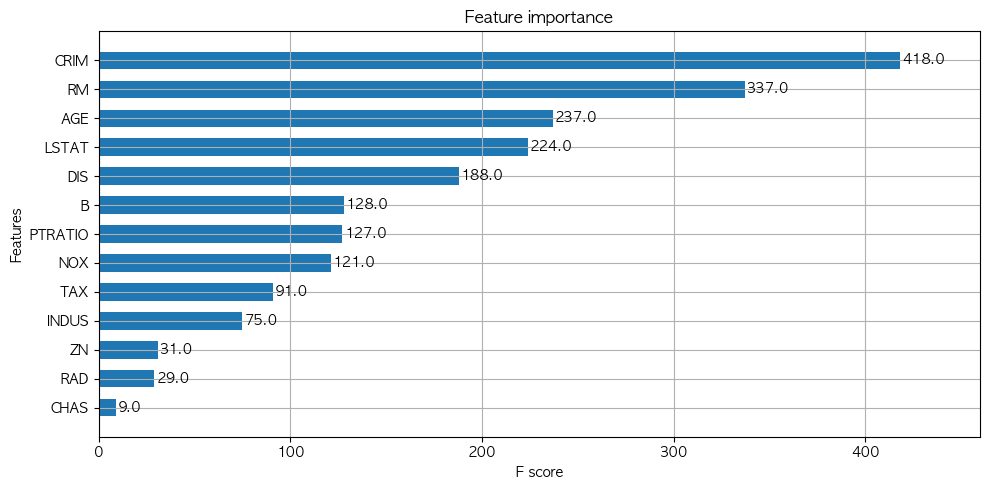

+---------+---------+-----------+----------+
|         |   score |      rate |   cumsum |
|---------+---------+-----------+----------|
| CRIM    |     418 |  0.207444 | 0.207444 |
| RM      |     337 |  0.167246 |  0.37469 |
| AGE     |     237 |  0.117618 | 0.492308 |
| LSTAT   |     224 |  0.111166 | 0.603474 |
| DIS     |     188 | 0.0933002 | 0.696774 |
| B       |     128 | 0.0635236 | 0.760298 |
| PTRATIO |     127 | 0.0630273 | 0.823325 |
| NOX     |     121 | 0.0600496 | 0.883375 |
| TAX     |      91 | 0.0451613 | 0.928536 |
| INDUS   |      75 | 0.0372208 | 0.965757 |
| ZN      |      31 | 0.0153846 | 0.981141 |
| RAD     |      29 | 0.0143921 | 0.995533 |
| CHAS    |       9 | 0.0044665 |        1 |
+---------+---------+-----------+----------+
+----+------------+------------+---------+
|    | 종속변수   | 독립변수   |     VIF |
|----+------------+------------+---------|
|  0 | MEDV       | CRIM       | 2.09518 |
|  1 | MEDV       | ZN         | 2.33731 |
|  2 | MEDV       | INDUS   

In [17]:
my_regression_result(estimator, x_train, y_train, x_test, y_test)
my_regression_report(estimator, x_train, y_train, x_test, y_test)